In [ ]:
import requests
url = 'https://storage.googleapis.com/wandb_datasets/nature_12K.zip'
r = requests.get(url, allow_redirects=True)
open('nature_12K.zip', 'wb').write(r.content)
!wget 'https://storage.googleapis.com/wandb_datasets/nature_12K.zip'
!unzip nature_12K.zip

Streaming output truncated to the last 5000 lines.
  inflating: inaturalist_12K/train/Arachnida/1ac25349af662e85f577a31f64beca41.jpg  
  inflating: inaturalist_12K/train/Arachnida/117ef7f1812725f359500448a258e713.jpg  
  inflating: inaturalist_12K/train/Arachnida/6409254954c3b46d88d64f0bf4c632fa.jpg  
  inflating: inaturalist_12K/train/Arachnida/aaed865750bd52944658a7dd23366948.jpg  
  inflating: inaturalist_12K/train/Arachnida/460cc09ef510d400a4d47a836ddd45e6.jpg  
  inflating: inaturalist_12K/train/Arachnida/55c48c3afef0b745e53951284cdb2db4.jpg  
  inflating: inaturalist_12K/train/Arachnida/bff3daa961ee96a37ebe12dc0bcce504.jpg  
  inflating: inaturalist_12K/train/Arachnida/9082d4f2107bccf1f14d71c8944be607.jpg  
  inflating: inaturalist_12K/train/Arachnida/93d0130423d42f7c6228150eb95a2a93.jpg  
  inflating: inaturalist_12K/train/Arachnida/051aba6d7bc324bad76bd438ed3cc276.jpg  
  inflating: inaturalist_12K/train/Arachnida/67595af09c015c7753d5d4935677590f.jpg  
  inflating: inaturalist_

In [ ]:
!pip install wandb
import wandb
import cv2


     |████████████████████████████████| 1.7 MB 5.2 MB/s 
     |████████████████████████████████| 181 kB 40.9 MB/s 
     |████████████████████████████████| 144 kB 47.1 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=3691f77d47daf00c9c236d1f78b474d17f14e4b2cf0098f6d5b13435af066099
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [ ]:
# import the necessary packages
import pandas as pd
import os
import keras
import tensorflow as tf
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten,BatchNormalization,Activation
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt


from tensorflow.keras.preprocessing.image import ImageDataGenerator

def data(image_size,augment_data,batch_size):
      home_path = "/content/inaturalist_12K"  # initialize the path to the *original* input directory of images
      # derive the paths to the training, validation, and testing
      train_path = os.path.join(home_path,'train')
      test_path = os.path.join(home_path,'val')
      if augment_data == True:# initialize the training data augmentation object
        train_data = ImageDataGenerator(rotation_range=10, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True,brightness_range=[0.2,1.2],validation_split=0.1) # brightness
        test_data = ImageDataGenerator(rotation_range=10, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True,brightness_range=[0.2,1.2]) # brightness

      else:
        train_data = ImageDataGenerator(rescale=1./255, validation_split=0.1)# initialize the training generator
        test_data = ImageDataGenerator(rescale=1./255)# initialize the test generator

      
      train_generator = train_data.flow_from_directory(directory= train_path,target_size=(image_size, image_size), batch_size=batch_size,color_mode="rgb",class_mode="categorical",subset = "training")
      val_generator = train_data.flow_from_directory(directory= train_path,target_size=(image_size, image_size), batch_size=batch_size,color_mode="rgb",class_mode="categorical",subset = "validation")
      test_generator = test_data.flow_from_directory(directory= test_path,target_size=(image_size, image_size), batch_size=batch_size,color_mode="rgb",class_mode="categorical")
      return train_generator,val_generator,test_generator

def CNN_model(image_size,kernel_size,num_filters,filter_org,dropout,batch_norm,epochs,dense_size,lr):
            if filter_org == "same":
                filters = [num_filters,num_filters,num_filters,num_filters,num_filters]
            if filter_org == "doubling": 
                filters = [num_filters,num_filters*2,num_filters*4,num_filters*8,num_filters*16]
            if filter_org == "halving":
                filters = [num_filters,int(num_filters/2),int(num_filters/4),int(num_filters/8),int(num_filters/16)]
            #initialising sequential model
            nature_model = Sequential()
            #First convolution layer
            nature_model.add(Conv2D(filters[0], kernel_size=(kernel_size, kernel_size),input_shape=(image_size,image_size,3)))
            nature_model.add(Activation('relu'))
            if batch_norm == True:
                          print("batch_norm")
                          nature_model.add(BatchNormalization()) 
            nature_model.add(MaxPooling2D(2, 2)) #pooling Layer
            #Second convolution layer
            nature_model.add(Conv2D(filters[1], kernel_size=(kernel_size, kernel_size),input_shape=(image_size,image_size,3)))
            nature_model.add(Activation('relu'))
            if batch_norm == True:
                          nature_model.add(BatchNormalization())
            nature_model.add(MaxPooling2D(2, 2))  #pooling Layer

            #Third convolution layer
            nature_model.add(Conv2D(filters[2], kernel_size=(kernel_size, kernel_size),input_shape=(image_size,image_size,3)))
            nature_model.add(Activation('relu'))
            if batch_norm == True:
                          nature_model.add(BatchNormalization())
            nature_model.add(MaxPooling2D(2, 2))  
            #Fourth convolution layer
            nature_model.add(Conv2D(filters[3], kernel_size=(kernel_size, kernel_size),input_shape=(image_size,image_size,3)))
            nature_model.add(Activation('relu'))

            if batch_norm == True:
                          nature_model.add(BatchNormalization())
            nature_model.add(MaxPooling2D(2, 2)) 
            #Fifth convolution layer
            nature_model.add(Conv2D(filters[4], kernel_size=(kernel_size, kernel_size),input_shape=(image_size,image_size,3)))
            nature_model.add(Activation('relu'))
            if batch_norm == True:
                          nature_model.add(BatchNormalization())
            nature_model.add(MaxPooling2D(2, 2))             
            nature_model.add(Flatten())
            nature_model.add(Dense(dense_size, activation='relu'))
            nature_model.add(Dropout(dropout))

            
            nature_model.add(Dense(10, activation='softmax'))
            return nature_model


In [ ]:
train_gen, val_gen, test_gen = data(image_size=200,augment_data=False,batch_size=200)
model = CNN_model(image_size=200,kernel_size=3,num_filters=64, filter_org="same",dropout=0.3, batch_norm=False,epochs=10,dense_size=64,lr=0.001)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics="categorical_accuracy")
model.fit(train_gen, epochs=15,validation_data=val_gen)
model.save("my_best_model.h5")

model.summary()


Found 9000 images belonging to 10 classes.
Found 999 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/15
45/45 [==============================] - 172s 3s/step - loss: 2.2947 - categorical_accuracy: 0.1136 - val_loss: 2.2438 - val_categorical_accuracy: 0.1932
Epoch 2/15
45/45 [==============================] - 137s 3s/step - loss: 2.2088 - categorical_accuracy: 0.1829 - val_loss: 2.1336 - val_categorical_accuracy: 0.2152
Epoch 3/15
45/45 [==============================] - 128s 3s/step - loss: 2.1299 - categorical_accuracy: 0.2216 - val_loss: 2.0992 - val_categorical_accuracy: 0.2573
Epoch 4/15
45/45 [==============================] - 126s 3s/step - loss: 2.0798 - categorical_accuracy: 0.2478 - val_loss: 2.0596 - val_categorical_accuracy: 0.2783
Epoch 5/15
45/45 [==============================] - 124s 3s/step - loss: 2.0166 - categorical_accuracy: 0.2743 - val_loss: 2.0131 - val_categorical_accuracy: 0.2883
Epoch 6/15
45/45 [=============================

In [ ]:
score = model.evaluate(test_gen,batch_size=200)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])
predictions = model(test_gen[0][0])


10/10 [==============================] - 28s 3s/step - loss: 1.7993 - categorical_accuracy: 0.3640
Test loss: 1.7993236780166626
Test accuracy: 0.36399999260902405


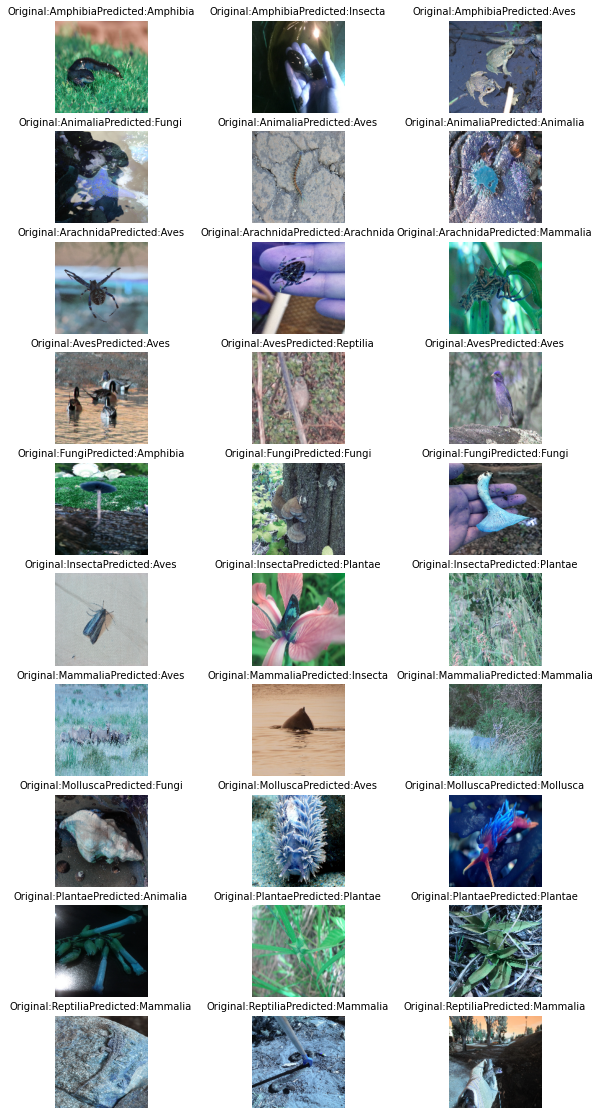

In [ ]:
classes=['Amphibia','Animalia','Arachnida','Aves','Fungi','Insecta','Mammalia','Mollusca','Plantae','Reptilia']
test_path = "/content/inaturalist_12K/val"
x,y,y_pred=[],[],[]
for category in classes:
    i=0
    path=os.path.join(test_path,category)
    for img in os.listdir(path):
      if i==3:
        break
      try:
        image = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
        x.append(image)
        y.append(category)
        pic = cv2.resize(image, (200,200)) / 255.0
        prediction = model.predict(pic.reshape(1,200, 200,3))
        c=prediction.argmax()
        y_pred.append(categories[c])
        i+=1
      except:
        break

#plotting a 10x3 grid with predictions
fig = plt.figure(figsize=(10,20))
rows,columns=10,3
i=1
for k in range(30):

  img=cv2.resize(x[k],(150,150))
  fig.add_subplot(rows,columns,i)
  plt.imshow(img)
  plt.axis('off')
  plt.title('Original:'+y[k]+'Predicted:'+y_pred[k],fontdict={'fontsize':10})
  i+=1   
wandb.init(entity='swe-rana',project='CS6910_Assignment2')
wandb.log({'predicting on sample images':plt})